In [1]:
## Import libraries

import pandas as pd # type: ignore
import yfinance as yf # type: ignore
import numpy as np # type: ignore
import statsmodels.api as sm # type: ignore
import matplotlib.pyplot as plt

from datetime import datetime

from Functions import *

In [2]:
## Define variables to Model

# Dark Mode to Charts
fn_DarkMode()

# Ten years to Training Model
# Mount_Start, Commision = 10000, 0
Year_Start, Years_Train, Years_Test, Years_Validate = 2011, 10, 1, 1

Date_Start_Train, Date_End_Train = datetime(Year_Start, 1, 1), datetime(Year_Start + Years_Train - 1, 12, 31)
Date_Start_Test, Date_End_Test = datetime(Year_Start + Years_Train, 1, 1), datetime(Year_Start + Years_Train, 12, 31)
Date_Start_Vali, Date_End_Vali = datetime(Year_Start + Years_Train + Years_Test, 1, 1), datetime(Year_Start + Years_Train + Years_Test, 12, 31)

In [3]:
## Processing Data

# Stocks from index Mexico IPC
df_stocks = pd.read_csv("IPC_Stocks.csv")
Symbols = df_stocks["Symbol"].to_list()

# Get data from Yahoo Finance
df_Stocks = yf.download(Symbols, start = Date_Start_Train, end = Date_End_Train)
df_Stocks = df_Stocks["Adj Close"]
df_Stocks = df_Stocks.rename(columns = {"^MXX": "IPC"})

# Update NaN from IPC
df_Stocks.loc["2011-12-26", "IPC"] = 37217.97
df_Stocks.loc["2012-01-02", "IPC"] = 37335.03
df_Stocks.loc["2014-12-26", "IPC"] = 43002.17

# Filter Data Non NaN
Counts = df_Stocks.isnull().sum()
ColumnsNaN = Counts[Counts == 0].index
df_Stocks = df_Stocks[ColumnsNaN]

# Rename Columns
df_Stocks.rename(columns=lambda x: x.replace('.MX', ''), inplace=True)

# Get Returns
df_Returns = np.log(round(df_Stocks / df_Stocks.shift(1), 6)).dropna()
df_Returns["IPC"] = df_Returns["IPC"].shift(-1)
df_Returns = df_Returns.dropna()
df_Returns

[*********************100%%**********************]  36 of 36 completed


Ticker,AC,ALFAA,ALSEA,AMXB,ASURB,BIMBOA,BOLSAA,CEMEXCPO,CHDRAUIB,ELEKTRA,...,LABB,LIVEPOLC-1,MEGACPO,OMAB,ORBIA,PE&OLES,PINFRA,TLEVISACPO,WALMEX,IPC
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,0.010444,0.035618,-0.000768,-0.022634,0.014609,0.005975,-0.003844,-0.004478,-0.007926,-0.005365,...,0.002322,-0.013760,-0.011033,-0.000843,-0.002705,-0.007852,0.004667,-0.021928,0.001139,0.003990
2011-01-05,0.025642,-0.001229,0.000768,0.037816,0.015647,0.022518,0.005379,-0.001497,-0.003720,-0.002956,...,0.026817,0.004208,-0.000634,0.006725,0.004729,-0.026087,-0.000465,-0.007893,0.015535,-0.002758
2011-01-06,-0.012579,-0.001077,0.000767,0.003342,-0.013678,-0.005842,0.000000,-0.021962,-0.003734,-0.001014,...,0.009953,-0.000120,0.014796,-0.002937,0.006494,-0.030394,-0.005372,-0.006519,0.002239,0.000290
2011-01-07,0.002401,0.000231,-0.001535,0.002500,-0.004648,0.000472,-0.024042,0.008388,0.000000,-0.003790,...,0.007955,-0.009525,-0.021798,0.000840,0.000893,-0.020481,0.002106,-0.006722,0.002793,-0.005786
2011-01-10,0.007960,-0.027914,0.000000,-0.005563,-0.015222,-0.002174,-0.009464,-0.026155,0.004001,-0.002764,...,-0.009235,-0.011084,0.005733,-0.002522,-0.003798,-0.015899,-0.006330,0.007998,-0.003072,-0.009145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,-0.017388,-0.048682,-0.017195,0.000000,0.007725,0.004042,-0.013502,-0.007851,-0.000717,-0.000186,...,-0.024521,-0.010238,-0.005712,0.006029,-0.005138,-0.039644,-0.023474,-0.013123,-0.004329,0.023101
2020-12-23,0.009305,0.069346,0.018356,-0.006873,0.003098,0.026000,0.013069,0.021443,0.005721,-0.002600,...,-0.005412,0.013819,0.006406,0.038210,0.009362,0.010363,0.011986,0.026702,0.012752,-0.005176
2020-12-24,-0.002083,-0.006367,0.005403,0.000000,-0.011011,-0.015378,0.019925,-0.011639,0.012048,0.001188,...,0.010256,0.003995,0.009259,-0.016645,0.007736,-0.007091,0.016154,-0.011992,-0.004651,0.011718


In [4]:
df_Returns.corr()

Ticker,AC,ALFAA,ALSEA,AMXB,ASURB,BIMBOA,BOLSAA,CEMEXCPO,CHDRAUIB,ELEKTRA,...,LABB,LIVEPOLC-1,MEGACPO,OMAB,ORBIA,PE&OLES,PINFRA,TLEVISACPO,WALMEX,IPC
Ticker,,,,,,,,,,,,,,,,,,,,,
AC,1.000000,0.233495,0.187211,0.064706,0.199414,0.283914,0.170027,0.240939,0.224876,0.111055,...,0.147389,0.279227,0.113075,0.199894,0.213298,0.171480,0.251383,0.167244,0.214590,0.009586
ALFAA,0.233495,1.000000,0.248792,0.105848,0.280269,0.282432,0.246830,0.317320,0.249344,0.163603,...,0.196836,0.344921,0.119577,0.276818,0.357608,0.195179,0.323451,0.256822,0.222076,0.029503
ALSEA,0.187211,0.248792,1.000000,0.090608,0.304599,0.199656,0.223498,0.267516,0.162780,0.082048,...,0.189555,0.264290,0.097887,0.286334,0.356618,0.146829,0.247563,0.188499,0.200031,0.051003
AMXB,0.064706,0.105848,0.090608,1.000000,0.121434,0.103287,0.090367,0.109644,0.093265,0.093106,...,0.073969,0.086478,0.027056,0.101303,0.098568,0.065452,0.094302,0.106985,0.086974,0.011389
ASURB,0.199414,0.280269,0.304599,0.121434,1.000000,0.243134,0.170642,0.287073,0.205240,0.104000,...,0.131703,0.284955,0.080784,0.425410,0.270453,0.144712,0.296329,0.319421,0.209329,0.070627
BIMBOA,0.283914,0.282432,0.199656,0.103287,0.243134,1.000000,0.231391,0.288691,0.305732,0.165814,...,0.192991,0.322120,0.150199,0.205503,0.305878,0.261886,0.273272,0.263171,0.263620,-0.010658
BOLSAA,0.170027,0.246830,0.223498,0.090367,0.170642,0.231391,1.000000,0.222234,0.208163,0.119728,...,0.189950,0.208133,0.148592,0.207418,0.257836,0.175659,0.243779,0.182244,0.188297,0.031169
CEMEXCPO,0.240939,0.317320,0.267516,0.109644,0.287073,0.288691,0.222234,1.000000,0.261657,0.139884,...,0.202308,0.268163,0.165595,0.251882,0.368016,0.224519,0.251582,0.342987,0.222144,0.045682
CHDRAUIB,0.224876,0.249344,0.162780,0.093265,0.205240,0.305732,0.208163,0.261657,1.000000,0.096074,...,0.137187,0.291407,0.109370,0.157184,0.240289,0.186693,0.215339,0.239255,0.254860,0.026929


<function matplotlib.pyplot.show(close=None, block=None)>

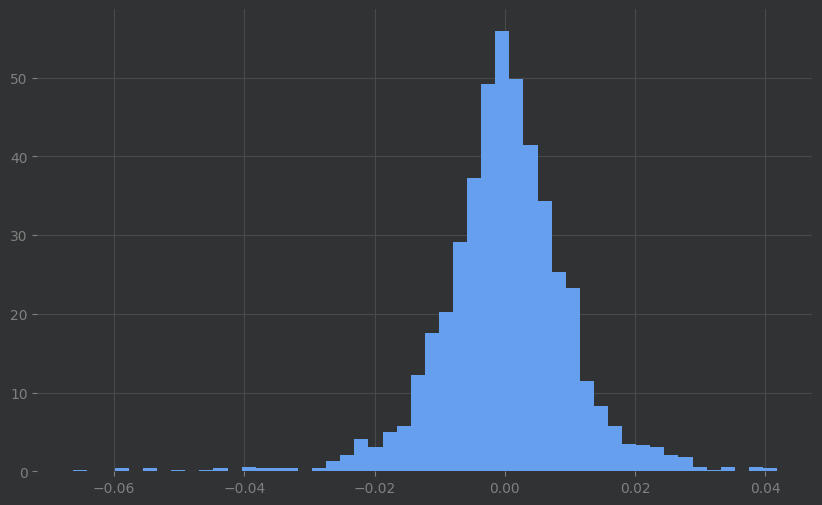

In [14]:
## Visualitization

# Normality Returns IPC
plt.figure(figsize=(10, 6))
plt.hist(df_Returns["IPC"], bins = 50, density = True)
plt.show

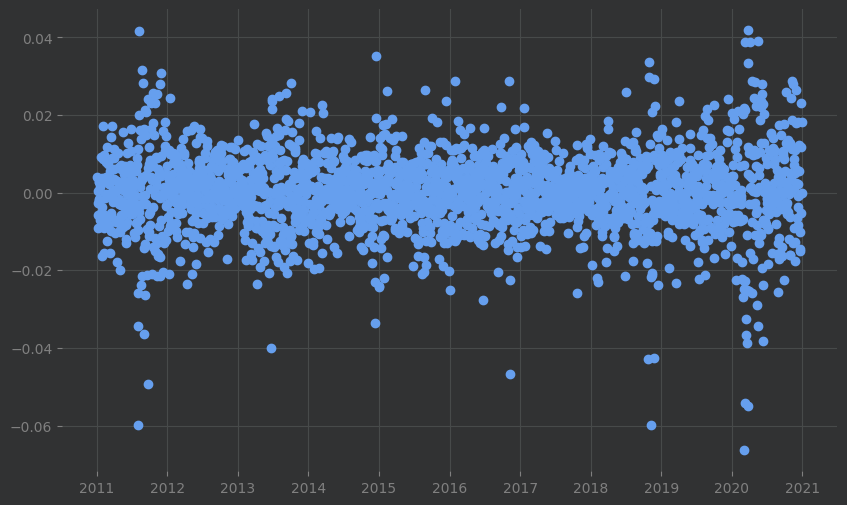

In [5]:
## Visualitization

# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_Returns.index, df_Returns["IPC"])

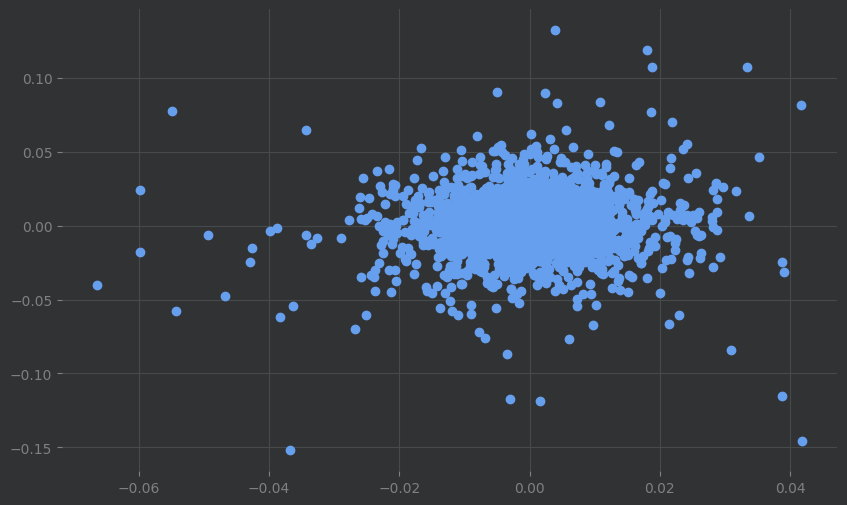

In [6]:
## Visualitization

# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_Returns["IPC"], df_Returns["OMAB"])

In [7]:
## Regression Model

# Define variables y & X
y = df_Returns["IPC"]
X = df_Returns.drop(columns = ["IPC"])
X = sm.add_constant(X)

# Create Regression Model with Statsmodels
model = sm.OLS(y, X).fit()
print(model.summary())

## Analizing reults, we only get GFINBURO because p-value <= 0.05 => 0.003

                            OLS Regression Results                            
Dep. Variable:                    IPC   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.619
Date:                Wed, 07 Aug 2024   Prob (F-statistic):             0.0196
Time:                        12:44:29   Log-Likelihood:                 8026.0
No. Observations:                2505   AIC:                        -1.599e+04
Df Residuals:                    2475   BIC:                        -1.582e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.801e-06      0.000     -0.044      0.9

In [8]:
## Regression Model Adjust

# Define variables y & X
y = df_Returns["IPC"]
X = df_Returns[["OMAB", "GAPB"]]

# Create Regression Model with Statsmodels
model = sm.OLS(y, X).fit()
print(model.summary())

## Analizing reults, we only get GFINBURO because p-value <= 0.05 => 0.003
## Analizing reults, we drop GAPB because p-value > 0.05 => 0.198

                                 OLS Regression Results                                
Dep. Variable:                    IPC   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              6.604
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                     0.00138
Time:                        12:44:38   Log-Likelihood:                          8009.0
No. Observations:                2505   AIC:                                 -1.601e+04
Df Residuals:                    2503   BIC:                                 -1.600e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
## Regression Model Adjust

# Define variables y & X
y = df_Returns["IPC"]
X = df_Returns[["OMAB"]]

# Create Regression Model with Statsmodels
model = sm.OLS(y, X).fit()
print(model.summary())

## Analizing reults, we only get GFINBURO because p-value <= 0.05 => 0.003

                                 OLS Regression Results                                
Dep. Variable:                    IPC   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              11.54
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                    0.000690
Time:                        12:44:41   Log-Likelihood:                          8008.2
No. Observations:                2505   AIC:                                 -1.601e+04
Df Residuals:                    2504   BIC:                                 -1.601e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------